[[5.0, 5.0], [4.9, 5.0], [4.804, 4.998], [4.7118, 4.994120000000001], [4.6232104000000005, 4.988473600000001], [4.538051456000001, 4.9811683360000005], [4.4561527644800005, 4.9723059984], [4.3773527738688, 4.9619829337216], [4.30149832158848, 4.9502903305245445], [4.228444195335432, 4.937314490345823], [4.158052717328931, 4.9231370844456155], [4.090193350324686, 4.907835397103282], [4.024742324253764, 4.89148255616771], [3.9615822824069675, 4.874147751529431], [3.9006019461412773, 4.855896442146982], [3.841695797138566, 4.8367905522268675], [3.7847637762975608, 4.8168886571251015], [3.7297109983881604, 4.79624615950855], [3.676447481642805, 4.774915456286142], [3.6248878915028158, 4.752946096793275], [3.5749512977785685, 4.730384932687466], [3.526560944521175, 4.707276259989288], [3.4796440319401136, 4.683661953679926], [3.434131509736108, 4.65958159524513], [3.3899578812515663, 4.635072593534949], [3.3470610178722024, 4.6101702992892815], [3.3053819831431, 4.58490811366094], [3.264864

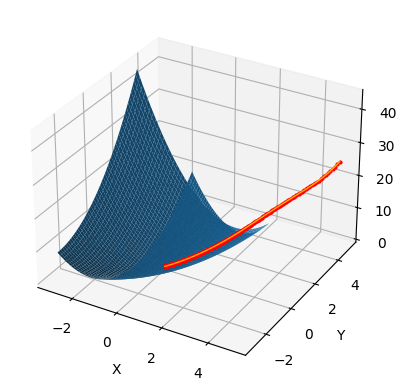

In [45]:
import math
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d


# x_0       = init
# x_{k + 1} = x_k + alpha * p_{k}
# x_{k + 1} = x_k - alpha * nabla(f(x_k))

# let  f(x, y)        = (y * x^2)
# then nabla(f(x, y)) = [2 * y * x, x^2]
# let alpha           = 0.001
# let x_0, y_0        = [1, 1]

# TODO: make nabla(x, y) for general

def f(x, y):
    return x ** 2 + (x - y) ** 2


def nabla(x, y):
    return [(2 * x + 2 * (x - y)), (-2 * (x - y))]


points = [[5.0, 5.0]]
alpha = 0.01

for i in range(1, 10000):
    a = nabla(points[i - 1][0], points[i - 1][1])[0]
    b = nabla(points[i - 1][0], points[i - 1][1])[1]
    c = points[i - 1][0] - a * alpha
    d = points[i - 1][1] - b * alpha
    points.append([c, d])

print(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array(f(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X1 = [p[0] for p in points] # x-овые координаты точек GD
Y1 = [p[1] for p in points] # y-овые координаты точек GD
Z1 = [f(p[0], p[1]) for p in points] # Z = f(X, Y), где X и Y - координаты точек GD
ax.plot(X1, Y1, Z1, '.', color='red', zorder=4, markersize=4) # рисуем точки GD цвета red
ax.plot(X1, Y1, Z1, linewidth=1, color='orange', zorder=4) # соединяем точки линиями ширины 0.5 и цвета orange

plt.show()
